In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom, norm
from math import comb

import warnings
warnings.filterwarnings("ignore")

In [2]:
p = 0.5   # Probability of a bulb being defective
n = 10     # Being probability known, now these many bulbs are purchased
k = 2      # Out of which Number of bulbs which are/can be found defective

# Probability Mass Function (PMF) for exactly 2 defective bulbs
probability_pmf = binom.pmf(k, n, p)


print("The probability that exactly 2 bulbs are defective is:")
print(f"Pre-defined binomial function \t: {probability_pmf:.6f}")

# Alternatively, we can apply Binomial distribution formula
# nCx · p^x . (1 − p)^(n−x)

print(f"Manual binomial function \t: {round(comb(n, k)*np.power(p, k)*np.power((1-p), (n-k)), 6)}")

The probability that exactly 2 bulbs are defective is:
Pre-defined binomial function 	: 0.043945
Manual binomial function 	: 0.043945


In [3]:
def plot_visuals(p,n):
    
    k_values = np.arange(0, n, 1)
    
    # Calculate probabilities and store them in a list
    p_probabilities = [binom.pmf(k, n, p) for k in k_values]

    # Calculate cummulative probabilities and store them in a list
    c_probabilities = [binom.cdf(k, n, p) for k in k_values]

    # Create a figure with two subplots
    plt.figure(figsize=(8, 3))
    
    # Create the first subplot for the stem plot
    plt.subplot(1, 2, 1)
    plt.stem(k_values, p_probabilities, markerfmt='bo', linefmt='-b', basefmt=' ', use_line_collection=True)
    plt.xlabel("Number of Defective Bulbs")
    plt.ylabel("Probability")
    plt.title(f"PMF where n = {n}")
    
    # Create the second subplot for the line plot
    plt.subplot(1, 2, 2)
    sns.lineplot(x=k_values, y=c_probabilities, color="b", marker="o")
    plt.xlabel("Number of Defective Bulbs")
    plt.ylabel("Probability")
    plt.title(f"CDF where n = {n}")

    # Adjust layout to avoid overlapping
    plt.tight_layout()

    # Show the plots
    plt.show()

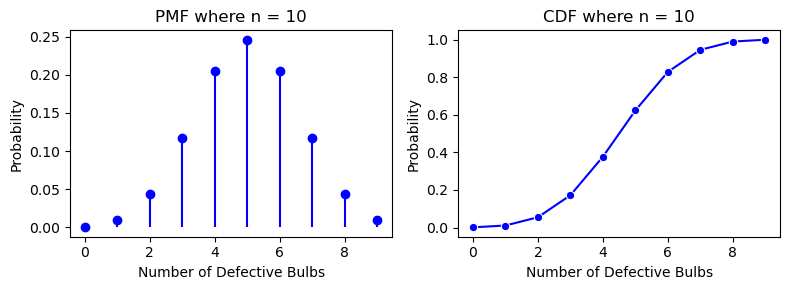

In [4]:
p = 0.5
n = 10    
plot_visuals(p,n)

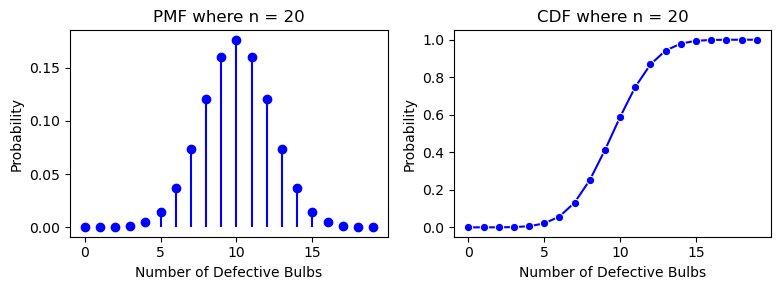

In [5]:
p = 0.5 
n = 20    
plot_visuals(p,n)

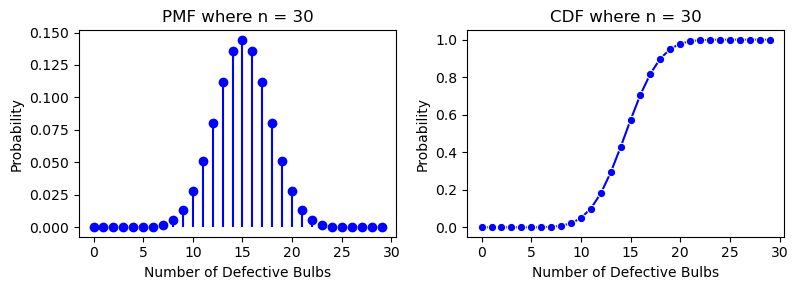

In [6]:
p = 0.5 
n = 30    
plot_visuals(p,n)

We can notice that as soon as the value of n in increasing, the probability of defective bulbs being found is also getting higher.
For. e.g. Initially we know that prob of getting one defective bulb is 0.5
this means that out of 10 bulbs, there will be 5 bulbs approximately which are defective
so if we have 20 bulbs in hand then the prob of 10 bulb being defective would be the highest
Similarly, if we have 30 bulbs, then prob of 15 bulbs being defective would be the highest 

In [7]:
# PMF tells us the probability of exactly k defetive bulbs
# However, CDF tells us the prob of atmost k defective bulbs 

In [8]:
# If we need prob of atleast k+1 defective bulbs, then it would be (1 - CDF)

In [9]:
# Define the parameters of the normal distribution
mean = 162  # Mean height in cm
std_dev = 6.8  # Standard deviation in cm

# Height you want to calculate the probability for
height = 158  # cm

# Calculate the z-score
z_score = (height - mean) / std_dev

# Calculate the cumulative probability (percentage)
probability = norm.cdf(z_score)

# Convert to percentage
percentage = probability * 100

print(f"The percentage of adult males shorter than {height} cm is approximately {percentage:.2f}%")

The percentage of adult males shorter than 158 cm is approximately 27.82%


In [10]:
# Define the parameters of the normal distribution
mean = 162  # Mean height in cm
std_dev = 6.8  # Standard deviation in cm

population_lst = []
cummulative_pop_lst = []
h_height = []

for height in np.arange(140, 185, 1):
    # Calculate the z-score
    z_score = (height - mean) / std_dev

    # Calculate the cdf and pdf
    prob = norm.pdf(z_score)
    prob1 = norm.cdf(z_score)

    # Convert to percentage
    percentage = prob * 100
    percentage1 = prob1 * 100
    
    population_lst.append(percentage)
    cummulative_pop_lst.append(percentage1)
    h_height.append(height)

In [11]:
len(population_lst), len(cummulative_pop_lst), len(h_height)

(45, 45, 45)

In [12]:
def plot_visuals_z_score():
    
    # Create a figure with two subplots
    plt.figure(figsize=(8, 3))
    
    # Create the first subplot for the stem plot
    plt.subplot(1, 2, 1)
    plt.stem(h_height, population_lst, markerfmt='bo', linefmt='-b', basefmt=' ', use_line_collection=True)

    plt.xlabel("Height")
    plt.ylabel("Probability")
    plt.title(f"PDF")
    
    # Create the second subplot for the line plot
    plt.subplot(1, 2, 2)
    sns.lineplot(x=h_height, y=cummulative_pop_lst, color="b", marker="o")
    plt.xlabel("Height")
    plt.ylabel("Cummulative Probability")
    plt.title(f"CDF")

    # Adjust layout to avoid overlapping
    plt.tight_layout()

    # Show the plots
    plt.show()

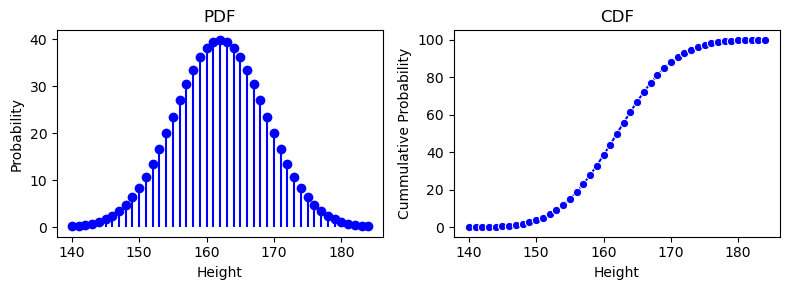

In [13]:
plot_visuals_z_score()

In [14]:
# Binomial and Poisson are both discrete distribution
# Normal distribution is based on continous values